In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})

BIG_SIZE = 14
BIGGER_SIZE = 16
BIGGEST_SIZE = 20

matplotlib.rc('axes', titlesize=BIGGEST_SIZE)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=BIGGEST_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

In [3]:
data1 = np.load('./data_for_xi_calculation/dX_data_t=25_to_t=35_grid_32_decor_t_1Dt_config1.npz')
data2 = np.load('./data_for_xi_calculation/dX_data_t=35_to_t=45_grid_32_decor_t_1Dt_config1.npz')

In [4]:
data1.files

['dX_x', 'dX_y']

In [5]:
dX1 = np.concatenate((data1['dX_x'], data2['dX_x']), axis=0)
dX2 = np.concatenate((data1['dX_y'], data2['dX_y']), axis=0)

In [6]:
dX1.shape, dX2.shape

((501, 7392), (501, 7392))

In [7]:
dX = np.concatenate((dX1, dX2), axis=1)
dX.shape

(501, 14784)

In [8]:
m = dX.shape[0]
print(m)

501


In [9]:
from numpy import linalg as LA
from scipy import signal

In [10]:
Dt_c = 0.04
scaled_dX = dX/np.sqrt(Dt_c)

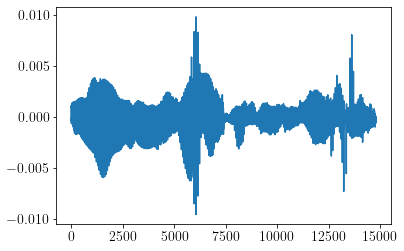

In [11]:
plt.plot(np.mean(scaled_dX, axis=0))

In [12]:
F = signal.detrend(scaled_dX, axis=0, type='constant')
F.shape

(501, 14784)

In [13]:
A, b, CT = LA.svd(F, full_matrices=False)

Text(0, 0.5, 'Eigenvalue, $\\lambda_i$')

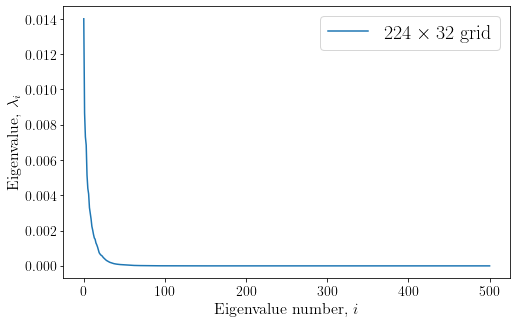

In [14]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(b**2/(m-1), label=r'$224 \times 32$ grid')
ax.legend()
ax.set_xlabel(r"Eigenvalue number, $i$")
ax.set_ylabel(r"Eigenvalue, $\lambda_i$")
plt.savefig("../plots/eigenvalue_grid_32_t25_to_t45.pdf", bbox_inches='tight')

In [15]:
B = np.diag(b/np.sqrt(m-1))

In [16]:
B.shape, CT.shape

((501, 501), (501, 14784))

In [17]:
BCT = np.matmul(B, CT)

In [18]:
var_vec = b**2/(m-1)

In [28]:
n_eigval = 53

p1 = 100*np.sum(var_vec[:n_eigval])/(np.sum(var_vec))

print(f'Total variance captured by first {n_eigval} eigenvalues: {p1}')

Total variance captured by first 53 eigenvalues: 99.00923968221511


In [32]:
n_eigval = 20

p1 = 100*np.sum(var_vec[:n_eigval])/(np.sum(var_vec))

print(f'Total vairance captured by first {n_eigval} eigenvalues: {p1}')

Total vairance captured by first 20 eigenvalues: 90.10059385334004


In [37]:
n_eigval = 10

p1 = 100*np.sum(var_vec[:n_eigval])/(np.sum(var_vec))

print(f'Total vairance captured by first {n_eigval} eigenvalues: {p1}')

Total vairance captured by first 10 eigenvalues: 72.57321914789452


In [38]:
combined_vec = BCT
detached_vec = np.zeros((combined_vec.shape[0],int(combined_vec.shape[1]/2),2))
for i in range(combined_vec.shape[0]):
    detached_vec[i,:,0] = combined_vec[i,:int(combined_vec.shape[1]/2)]
    detached_vec[i,:,1] = combined_vec[i,int(combined_vec.shape[1]/2):]
    
combined_vec.shape, detached_vec.shape

((501, 14784), (501, 7392, 2))

In [39]:
xi_mat = detached_vec

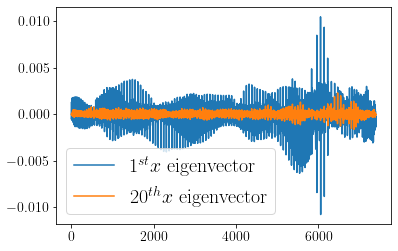

In [43]:
plt.plot(xi_mat[0,:,0], label=r'$1^{st} x$ eigenvector'), plt.plot(xi_mat[19,:,0], label=r'$20^{th} x$ eigenvector')
plt.legend()

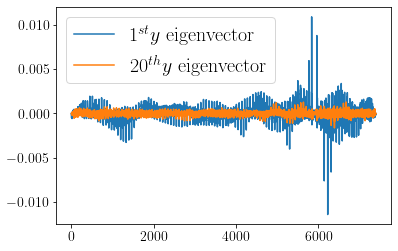

In [44]:
plt.plot(xi_mat[0,:,1], label=r'$1^{st} y$ eigenvector'), plt.plot(xi_mat[19,:,1], label=r'$20^{th} y$ eigenvector')
plt.legend()

In [45]:
eig_vec = xi_mat[:53,:,:]
eig_vec.shape

(53, 7392, 2)

In [46]:
data_file = './xi_vec_data/xi_matrix_53_eigv_grid_32_t=25_to_t=45_config1.npz'

np.savez(data_file, xi_mat = eig_vec)